In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading csv, setting options

In [420]:
df = pd.read_csv ('/Users/Marcy_Student/Desktop/marcy/EDA-PRACTICE/Data/Air_Quality.csv')
pd.set_option("display.precision", 2)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

#Important note: All the units are in µg/m³ except for CO2

# Exploring data and data understanding

In [421]:
# EXPLORING DATA, DATA UNDERSTANDING
df.columns # 10 columns
df.info() # float 8, object 2
df.dtypes #notice that the date type is a string(object)
df["City"].value_counts() # The data contains 6 cities
df.describe()
df.describe(include=object)
df.isna().sum() #only CO2 column has missing values (#43056)
df.loc[df.duplicated()] # no duplicated values in the dataframe
df.loc[df["CO2"].isna()] #82% of CO2 is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   CO2     9648 non-null   float64
 4   NO2     52704 non-null  float64
 5   SO2     52704 non-null  float64
 6   O3      52704 non-null  float64
 7   PM2.5   52704 non-null  float64
 8   PM10    52704 non-null  float64
 9   AQI     52704 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB


,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.8
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.0
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.6
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.2
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.0
...,...,...,...,...,...,...,...,...,...,...
51091,2024-10-25 19:00:00+00:00,Sydney,111.0,NaN,7.9,3.8,42.0,5.5,9.5,16.8
51092,2024-10-25 20:00:00+00:00,Sydney,117.0,NaN,8.2,4.4,42.0,5.9,10.0,16.8
51093,2024-10-25 21:00:00+00:00,Sydney,120.0,NaN,7.9,4.6,44.0,6.5,10.9,17.6
51094,2024-10-25 22:00:00+00:00,Sydney,117.0,NaN,6.3,4.0,49.0,5.8,10.4,19.6


# Data manipulation
1- Handling missing data, grouping by City\
2- Looking for outliers\
3- Formating data (date_type)\
4- visualize some patterns

CO: 3587 outliers out of 52704 total (6.8%)
NO2: 1826 outliers out of 52704 total (3.5%)
SO2: 3744 outliers out of 52704 total (7.1%)
O3: 1643 outliers out of 52704 total (3.1%)
PM2.5: 3343 outliers out of 52704 total (6.3%)
PM10: 5935 outliers out of 52704 total (11.3%)
AQI: 1462 outliers out of 52704 total (2.8%)
the first date is 2024-01-01      The last date is 2024-12-31
              CO    NO2    SO2     O3  PM2.5    PM10    AQI
City                                                       
Brasilia  221.45   8.74   1.62  57.76   6.55    8.89  24.75
Cairo     293.82  32.62  38.29  61.10  23.74   43.42  52.49
Dubai     440.46  39.49  20.31  93.88  41.57  111.04  85.11
London    187.74  21.80   3.33  49.15   9.99   14.14  27.10
New York  283.64  27.80   6.25  52.12  13.36   18.95  32.88
Sydney    122.43  14.17   5.62  46.14  10.94   17.42  25.77


<Axes: xlabel='City'>

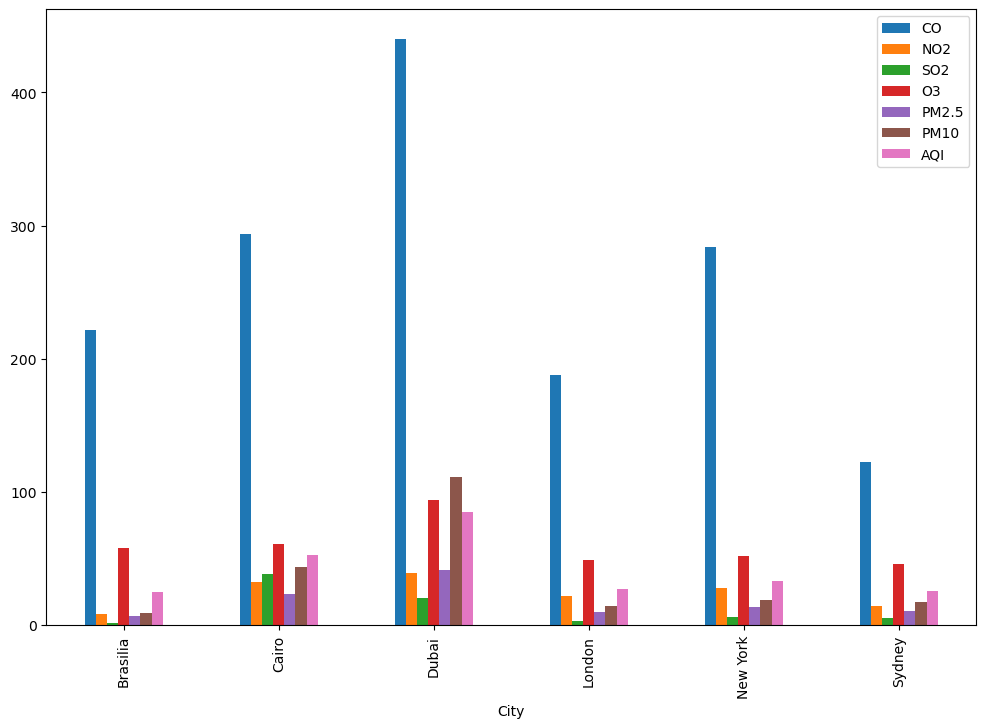

In [422]:
# Data Preparation
df_city = df.groupby("City")[['CO','CO2','NO2','SO2','O3','PM2.5','PM10','AQI']].mean() #grouped data by city, aggregated by the mean
df_city.drop("CO2", axis=1, inplace= True) # drop the CO2 column due to excessive missing value
 
# Looking for any outlier using the IQR method
columns = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']
for column in columns:
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    total = df[column].notna().sum()

    print(f"{column}: {len(outliers)} outliers out of {total} total ({len(outliers)/total:.1%})")

# Date time preparation 

df[["Date"]].value_counts()
df["Date"]=pd.to_datetime(df["Date"]) #converted the datetime to date format.
df.dtypes
df['YMD'] = df['Date'].dt.strftime('%Y-%m-%d') # extraction of the Year month and day and create a new column called YMD
df["YMD"].value_counts() # each day has 144 meaures, we have 365 days

first_date = df['YMD'].min()
last_date = df['YMD'].max()

print(f"the first date is {first_date} \
     The last date is {last_date}")
# The data is 12 months longs, for the year 2024. from january 1st to December 31

print(df_city)
#visualize the distribution of gaz for eah city using a barplot
df_city.plot(kind= 'bar', xlabel= "City", figsize=(12,8)) 

In [423]:
# Date time preparation 

df[["Date"]].value_counts()
df["Date"]=pd.to_datetime(df["Date"]) #converted the datetime to date format.
df.dtypes
df['YMD'] = df['Date'].dt.strftime('%Y-%m-%d') # extraction of the Year month and day and create a new column called YMD
df["YMD"].value_counts() # each day has 144 meaures, we have 365 days

first_date = df['YMD'].min()
last_date = df['YMD'].max()

print(f"the first date is {first_date} \
     The last date is {last_date}")
# The data is 12 months longs, for the year 2024. from january 1st to December 31

the first date is 2024-01-01      The last date is 2024-12-31


# Questions to answer
1- what are the polution level for each pollutant ( max, min, average ...) \
2- which cities are most polluted \
3- Is there a seasonal pattern for the polutant ( winter vs summer for instance )\
4- Are pollution higher in specifics hours of the day \
5- Are certain pollutant correlated \
6- Guess if an outlier can be due to a phenomenon like a fire \

In [424]:
# 1 FINDING THE POLUTION LEVEL FOR EACH POLLUTANT
df_stats = df[['CO','NO2','SO2','O3','PM2.5','PM10','AQI']].agg(['mean','max','min']) # for all cities
df_city_stats = df.groupby("City").agg({'CO':['mean','max','min'],
                                  'NO2':['mean','max','min'],
                                  'SO2':['mean','max','min'],
                                  'O3':['mean','max','min'],
                                  'PM2.5':['mean','max','min'],
                                  'PM10':['mean','max','min'],
                                  'AQI':['mean','max','min']
                                  })                                    # for each city
df_city_stats

CO                   NO2                SO2                 O3  \
            mean     max    min   mean    max  min   mean    max  min   mean   
City                                                                           
Brasilia  221.45   963.0   79.0   8.74   57.7  0.0   1.62    5.4  0.0  57.76   
Cairo     293.82  1683.0  137.0  32.62  144.2  6.3  38.29  239.7  7.9  61.10   
Dubai     440.46  2045.0  162.0  39.49  165.9  6.0  20.31  110.1  3.4  93.88   
London    187.74   536.0  105.0  21.80   87.4  1.8   3.33   41.3  0.3  49.15   
New York  283.64  1346.0  114.0  27.80   99.1  0.0   6.25   32.8  1.0  52.12   
Sydney    122.43   434.0   52.0  14.17   62.8  1.0   5.62   30.1  0.5  46.14   

                      PM2.5                PM10                 AQI          \
            max  min   mean    max  min    mean    max   min   mean     max   
City                                                                          
Brasilia  174.0  2.0   6.55   41.9  0.1    8.89   60.1   0.1  24.75   68.00   
Cairo     157.0  0.0  23.74  111.3  6.5   43.42  245.3  10.8  52.49  114.68   
Dubai     349.0  0.0  41.57  129.5  5.5  111.04  543.9   8.1  85.11  196.63   
London    142.0  0.0   9.99   45.1  0.8   14.14   55.1   1.2  27.10   70.37   
New York  235.0  0.0  13.36   73.8  0.7   18.95   93.4   1.0  32.88   81.24   
Sydney    198.0  0.0  10.94   44.1  0.7   17.42   64.5   1.0  25.77   72.36   

                 
            min  
City             
Brasilia   4.45  
Cairo     20.80  
Dubai     29.60  
London     9.07  
New York  10.35  
Sydney     8.80

In [425]:
# 2 FINDING THE MOST POLLUTED CITIES,
# WE WILL USE THE AQI TO FIND THE CITIES. The Air Quality Index (AQI) is a single number that indicates how clean or polluted the air is, and how dangerous it might be for health. the higher it is, the most pollutant it will be.
print(df_city.sort_values(by='AQI', ascending=False)) # sorted the grouped data by AQI (the mean is used), descending order
# the biggest pollutant city is DUBAI, then CAIRO, NEW YORK, LONDON, SYDNEY


              CO    NO2    SO2     O3  PM2.5    PM10    AQI
City                                                       
Dubai     440.46  39.49  20.31  93.88  41.57  111.04  85.11
Cairo     293.82  32.62  38.29  61.10  23.74   43.42  52.49
New York  283.64  27.80   6.25  52.12  13.36   18.95  32.88
London    187.74  21.80   3.33  49.15   9.99   14.14  27.10
Sydney    122.43  14.17   5.62  46.14  10.94   17.42  25.77
Brasilia  221.45   8.74   1.62  57.76   6.55    8.89  24.75


   season      CO    NO2    SO2     O3  PM2.5   PM10    AQI
0    fall  274.13  25.12  12.37  57.45  16.63  31.14  39.26
1  spring  245.85  24.57  11.16  60.55  17.99  35.96  40.95
2  summer  233.93  20.50  11.24  73.09  18.80  45.09  45.32
3  winter  279.53  26.25  15.55  48.86  17.32  30.28  39.83


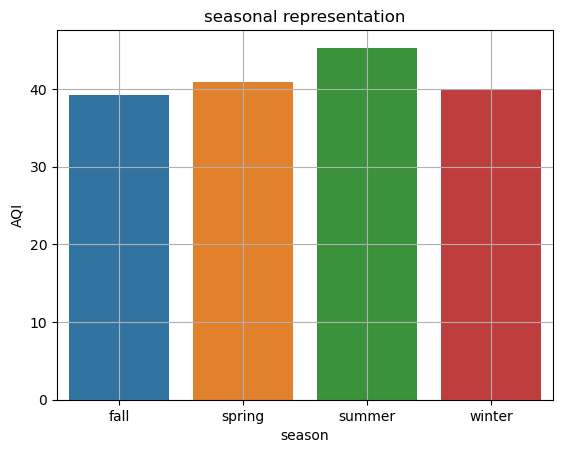

In [426]:
# 3 Find seasonal pattern
# slicing my data into 4 seasons
def assign_season(month):
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    else:
        return 'fall'
df['season']=df['Date'].dt.month.apply(assign_season)
df.head(5000)

#grouping by season

df_season = df.groupby('season')[['CO','NO2','SO2','O3','PM2.5','PM10','AQI']].mean().reset_index()
print(df_season)
sns.barplot(data = df_season, x = "season", y ='AQI' ,hue= "season")
plt.title('seasonal representation')
plt.grid(True)
plt.show()
#There is a slight increase of the polution in the summer, accross all the city.

    df_hours      CO    NO2    SO2     O3  PM2.5   PM10    AQI
0          0  276.67  28.47  10.87  47.08  19.80  36.92  39.98
1          1  273.86  27.56  10.93  46.50  19.52  36.60  39.99
2          2  270.36  26.67  11.16  46.00  19.30  36.35  40.16
3          3  267.74  25.96  11.55  45.87  19.50  36.81  40.27
4          4  266.35  25.19  12.37  47.19  19.78  37.93  40.21
5          5  271.66  24.91  14.24  49.76  19.53  38.49  40.07
6          6  277.69  25.20  16.78  52.38  18.91  38.64  39.84
7          7  273.91  25.31  17.90  55.19  18.24  38.27  39.46
8          8  265.20  24.22  17.42  59.36  17.61  37.64  39.26
9          9  255.44  22.58  15.88  63.84  17.13  36.76  39.62
10        10  246.60  21.01  14.18  68.45  16.67  35.86  40.41
11        11  240.34  20.12  12.59  71.86  16.31  34.92  41.48
12        12  233.63  19.20  11.35  74.31  15.53  32.98  42.42
13        13  230.51  18.93  10.59  74.93  15.47  32.70  42.75
14        14  228.14  18.89  10.07  74.70  15.24  32.24

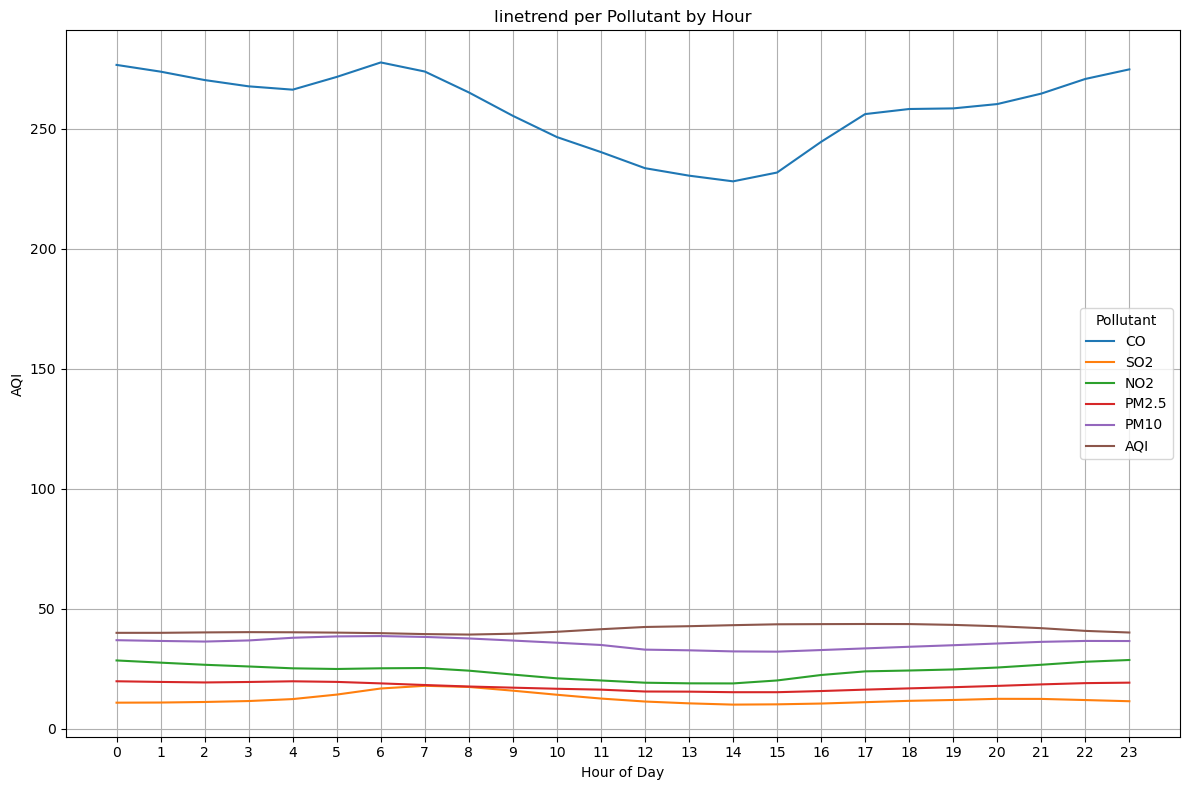

None


In [427]:
# Finding if the pollution have a peak moment in specifics hours
df['df_hours']= df['Date'].dt.hour
#df['df_hours'].dtypes
df_byhour= df.groupby('df_hours')[['CO','NO2','SO2','O3','PM2.5','PM10','AQI']].mean().reset_index()
print(df_byhour)
plt.figure(figsize=(12,8))
plt.plot(df_byhour['df_hours'], df_byhour['CO'], label='CO')
plt.plot(df_byhour['df_hours'], df_byhour['SO2'], label='SO2')
plt.plot(df_byhour['df_hours'], df_byhour['NO2'], label='NO2')
plt.plot(df_byhour['df_hours'], df_byhour['PM2.5'], label='PM2.5')
plt.plot(df_byhour['df_hours'], df_byhour['PM10'], label='PM10')
plt.plot(df_byhour['df_hours'], df_byhour['AQI'], label='AQI')
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(0, 24)])
plt.xlabel("Hour of Day")
plt.ylabel("AQI")
plt.title("linetrend per Pollutant by Hour")
plt.legend(title="Pollutant")
plt.grid(True)
plt.tight_layout()
print(plt.show())

#there is no significance difference accross time for the polutant. only CO tend to decrease between 9-17. we have linear line

In [428]:
# Finding corelation between polutant 
